# Spec_Tools Tutorial

This is a small showcase of all the tools in the spec_tools python package which should aid the analysis of IR spectra using Python

# Modules

-spectra_plot a variety of functions to plot an visualize
-baseline_fitting contains some methode for the fitting of baselines to a given spectrum



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pybaselines import Baseline, utils
from modules import spec_tools, spectra_plotting

# Tutorial: How to Plot Spectra

Loading of the data can be done with the **data_read_csv()** function contained in the spec_tools module



In [63]:
data, data_np = spec_tools.data_read_csv("shee2.csv",sep=";",comma=",", header=2)

print(data_np.shape)

(57813, 4)


### Simple Spectrum Plot:

For this the Function **plot_specta** from the spectra_plotting toolbox can be used

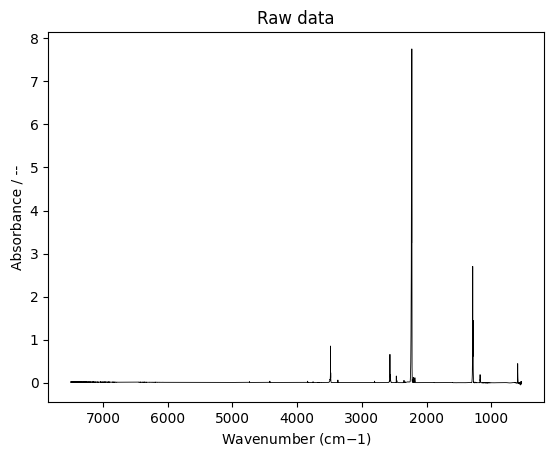

In [64]:
spectra_plotting.plot_spectra(data_np[:,0],data_np[:,1],title="Raw data")


### Overlay different spectra

To overlay different spectra one can:

+ Load in the Data 
+ Combine Data in a array
+ Add annotations



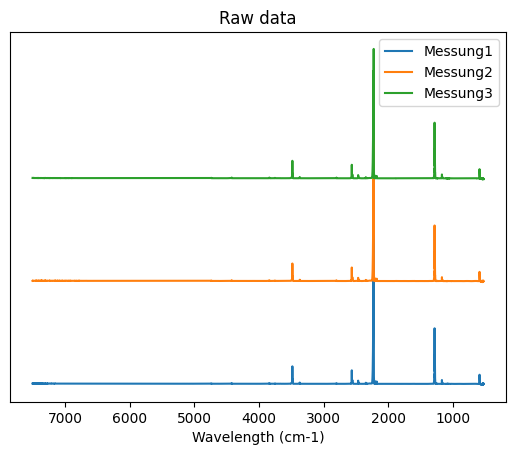

In [108]:
data, data_np = spec_tools.data_read_csv("shee2.csv",sep=";",comma=",")

annotations = ["Messung1","Messung2", "Messung3"]

spectra_plotting.overlay_spectra(data_np, title="Raw data",annotations=annotations,y_axis=False, shift=5)



### Plot Multiple Spectra Windows:

For this the function **plot_multiple_spectral_window()** can be used



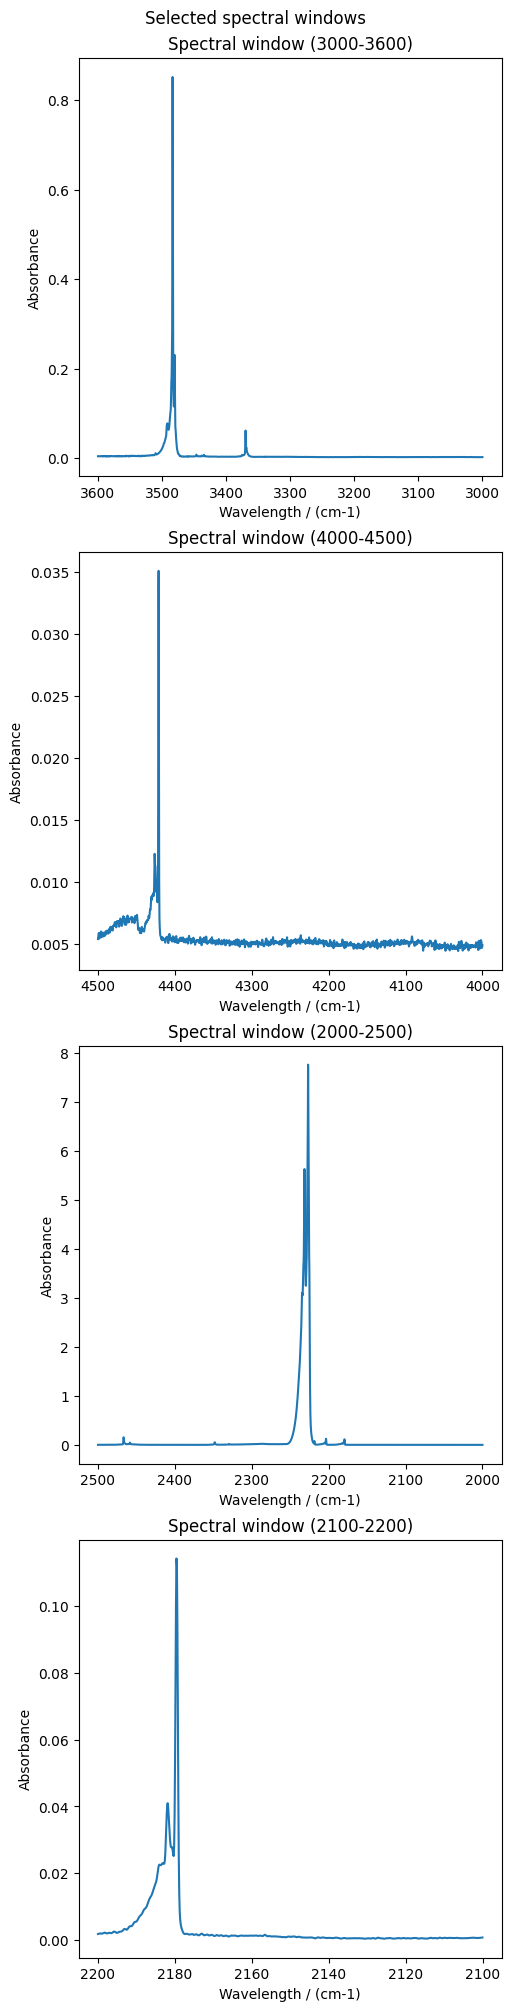

In [109]:
def plot_multiple_spectral_window(x,y,spectral_windows, title, cols = 2):
    """ 
    Plots multiple selected spectral windows in a side by side plot

    Parameters:
        x (np.array): x values of the spectra
        y (np.array): y values of the spectra
        spectral_windows (list): list of spectral windows to plot
        title (str): title of the plot
        cols (int): number of columns in the plot


        TODO: Work on Figsize Option
    """
    num_windows = len(spectral_windows)
    rows = (num_windows) // cols


    fig, ax = plt.subplots(rows,cols, figsize=(5*cols,5*rows), constrained_layout=True)
    ax.flatten()
    for i in range(num_windows):
        mask = np.logical_and(x >=spectral_windows[i][0], x < spectral_windows[i][1])
        x_mask = x[mask]
        y_mask = y[mask]
        ax[i].plot(x_mask,y_mask)
        ax[i].set_title(f"Spectral window ({spectral_windows[i][0]}-{spectral_windows[i][1]})")
        ax[i].set_xlabel("Wavelength / (cm-1)")
        ax[i].set_ylabel("Absorbance")
        ax[i].invert_xaxis()
    fig.suptitle(title)
    plt.show()
plot_multiple_spectral_window(data_np[:,0],data_np[:,1],[[3000,3600],[4000,4500],[2000,2500], [2100,2200]],"Selected spectral windows", cols=1)


In [113]:
# Peak integration
# Let's begin by importing some libraries we'll need
import numpy as np
from __future__ import print_function # So that this notebook becomes both Python 2 and Python 3 compatible

# And creating some random data
size = 10
np.random.seed(0)
x_data = np.arange(size)
y_data = np.cumsum(np.random.randn(size)  * 100.0)

from bqplot import pyplot as plt

# Creating a new Figure and setting it's title
plt.figure(title='My Second Chart')
# Let's assign the scatter plot to a variable
scatter_plot = plt.scatter(x_data, y_data)

# Let's show the plot
plt.show()

# then enable modification and attach a callback function:

def foo(change):
    print('This is a trait change. Foo was called by the fact that we moved the Scatter')
    print('In fact, the Scatter plot sent us all the new data: ')
    print('To access the data, try modifying the function and printing the data variable')
    global pdata 
    pdata = [scatter_plot.x,scatter_plot.y]

# First, we hook up our function `foo` to the colors attribute (or Trait) of the scatter plot
scatter_plot.observe(foo, ['y','x'])

scatter_plot.enable_move = True

